# ⚖️ Gender Inequality Index

**Português:**
O Índice de Desigualdade de Gênero (GII) mede tal desigualdade considerando disparidades em saúde, educação e oportunidades econômicas. Desenvolvido pelo Programa de Desenvolvimento das Nações Unidas (UNDP), o GII é uma medida de desigualdade de gênero que analisa indicadores de saúde, empoderamento e participação no mercado de trabalho.
Dados de 2021.

**English:**
The Gender Inequality Index (GII) dataset provides a comprehensive measure of gender inequality across countries, capturing gender disparities in health, education, and economic opportunities. Developed by the United Nations Development Programme (UNDP), the GII measures gender inequality by analyzing health, empowerment, and labor market participation indicators.

This dataset includes GII scores, as well as component scores for each indicator, for over 190 countries, in 2021.

Columns: 
- Country | País
- Human_development (Category: Low, Medium, High, Very High) | Desenvolvimento Humano: Baixo, Médio, Alto, Muito Alto
- GII (Gender Inequality Index) | Índice de Desigualdade de Gênero
- Rank | Classificação
- Maternal_mortality (Maternal mortality ratio (deaths per 100,000 live births)) | Mortalidade maternal (Mortes por 100.000 nascimentos)
- Adolescent_birth_rate (Adolescent birth rate (births per 1,000 women ages 15–19)) | Maternidade de adolescentes (Nascimentos por 100.000 mulheres entre 15 e 19 anos)
- Seats_parliament (Share of seats in parliament (% held by women)) | Cadeiras no Parlamento (% ocupadas por mulheres)
- F_secondary_educ (Females with at least some secondary education (% ages 25 and older)) | Mulheres com pelo menos educação secundária (% com 25 anos ou mais)
- M_secondary_educ (Males with at least some secondary education (% ages 25 and older)) | Homens com pelo menos educação secundária (% com 25 anos ou mais)
- F_Labour_force (Female - Labour force participation rate (% ages 15 and older)) | Força de trabalho feminina (% com 15 anos ou mais)
- M_Labour_force (Male - Labour force participation rate (% ages 15 and older)) | Força de trabalho masculina (% com 15 anos ou mais)

In [225]:
# Importanto bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns

#importa dados do arquivo csv
df = pd.read_csv("Gender_Inequality_Index.csv", sep="," , encoding= 'UTF-8')
df.info()

In [226]:
#importa dados do arquivo csv
df = pd.read_csv("Gender_Inequality_Index.csv", sep="," , encoding= 'UTF-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Human_development      191 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     184 non-null    float64
 5   Adolescent_birth_rate  195 non-null    float64
 6   Seats_parliament       193 non-null    float64
 7   F_secondary_educ       177 non-null    float64
 8   M_secondary_educ       177 non-null    float64
 9   F_Labour_force         180 non-null    float64
 10  M_Labour_force         180 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.9+ KB


In [227]:
# Descrição com principais estatísticas de cada coluna
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GII,170.0,0.344376,0.197105,0.013,0.1775,0.363,0.50575,0.82
Rank,170.0,85.376471,49.210206,1.000,43.2500,85.500,127.75000,170.00
Maternal_mortality,184.0,160.027174,233.028867,2.000,12.7500,53.000,188.25000,1150.00
Adolescent_birth_rate,195.0,44.597949,38.422479,1.600,10.7500,36.200,64.20000,170.50
Seats_parliament,193.0,24.701554,12.404319,0.000,16.5000,23.600,33.60000,55.70
F_secondary_educ,177.0,62.706780,29.528487,6.400,37.7000,69.900,90.20000,100.00
M_secondary_educ,177.0,67.068362,26.450033,13.000,44.8000,71.200,92.50000,100.00
F_Labour_force,180.0,50.224444,15.905491,6.000,42.4000,52.150,60.47500,83.10
M_Labour_force,180.0,69.863333,9.012734,43.900,65.0500,69.350,75.52500,95.50


Text(0, 0.5, 'Países')

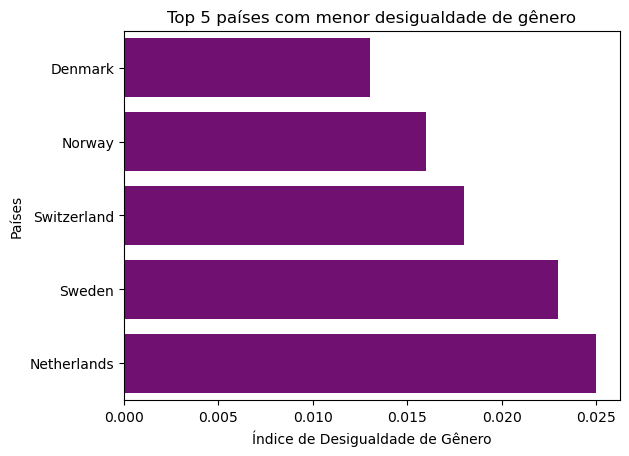

In [228]:
# Identificando os 5 países com menor desigualdade de gênero
df.sort_values(by="Rank", inplace=True)
top_5 = df.head(5)
fig, ax = plt.subplots()
sns.barplot(x=df["GII"], y=top_5["Country"], color="purple", ax=ax)

ax.set_title("Top 5 países com menor desigualdade de gênero")
ax.set_xlabel("Índice de Desigualdade de Gênero")
ax.set_ylabel("Países")

In [229]:
# Identificando como a localização de cada país influencia na desigualdade de gênero.
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode="country names",
                    color="GII", 
                    hover_name="Country",
                    projection="natural earth", 
                    title="Índice de Desigualdade de Gênero por país")
fig.show()

In [230]:
# transformando objeto Human_development em string
human_development_strings = df["Human_development"].apply(lambda x: str(x))

In [231]:
#Preparando média de GII por IDH
media_por_IDH = df["GII"].groupby(human_development_strings).mean()
media_por_IDH.dropna(inplace=True)
media_por_IDH_numeric = media_por_IDH.to_numpy()
media_por_IDH_numeric

array([0.34169048, 0.59386667, 0.47947222, 0.14703226])

In [232]:
# Identificando valores únicos de IDH
human_development_strings = human_development_strings.unique()
human_development_strings

array(['Very high', 'High', 'Medium', 'Low', 'nan'], dtype=object)

ValueError: Grouper and axis must be same length

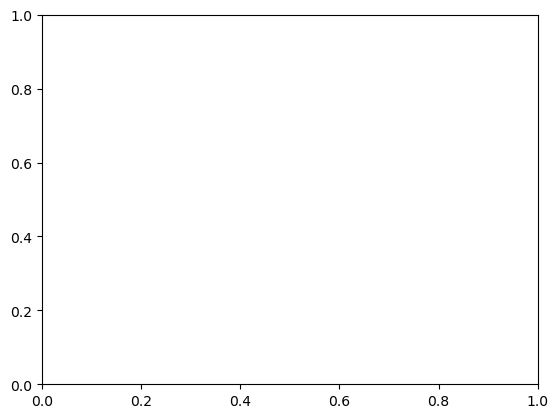

In [233]:
# Identifiando a variação do GII pelo IDH
#color = ["orange", "red", "green", "black"]
fig, ax = plt.subplots()
sns.barplot(x=human_development_strings, y=media_por_IDH_numeric, color="purple", ax=ax)
ax.set_title("Índice de Desigualdade de Gênero por IDH")
ax.set_xlabel("IDH")
ax.set_ylabel("Índice de Desigualdade de Gênero")

Text(0, 0.5, 'Índice de Desigualdade de Gênero')

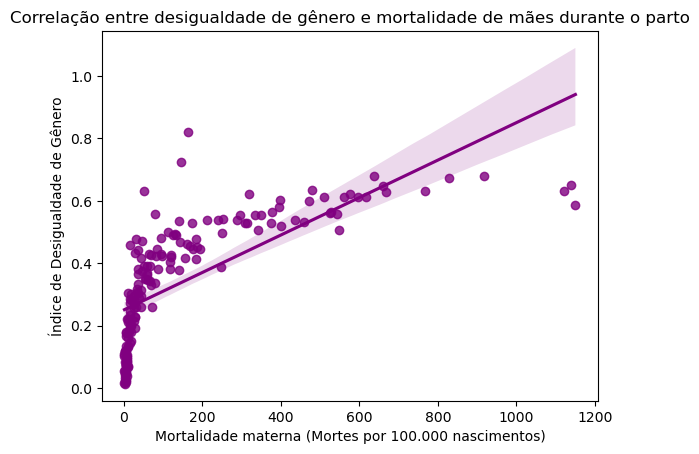

In [ ]:
# Identificando a correlação entre desigualdade de gênero e mortalidade de mães durante o parto
fig, ax = plt.subplots()
sns.regplot(x=df["Maternal_mortality"], y=df["GII"], color="purple", ax=ax)

ax.set_title("Correlação entre desigualdade de gênero e mortalidade de mães durante o parto")
ax.set_xlabel("Mortalidade materna (Mortes por 100.000 nascimentos)")
ax.set_ylabel("Índice de Desigualdade de Gênero")

Text(0, 0.5, 'Índice de Desigualdade de Gênero')

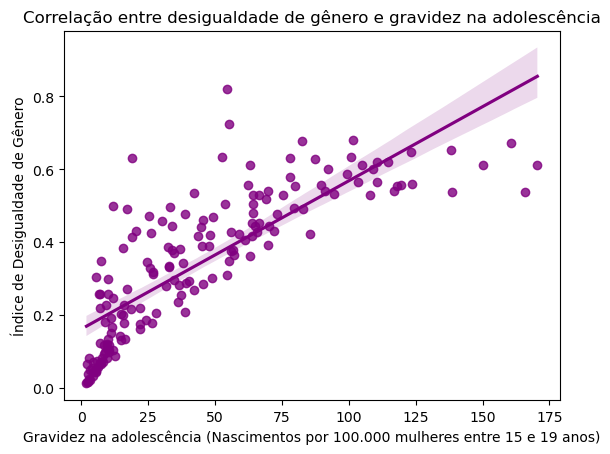

In [ ]:
#Identificando a Correlação entre desigualdade de gênero e gravidez na adolescência
fig, ax = plt.subplots()
sns.regplot(x=df["Adolescent_birth_rate"], y=df["GII"], color="purple", ax=ax)

ax.set_title("Correlação entre desigualdade de gênero e gravidez na adolescência")
ax.set_xlabel("Gravidez na adolescência (Nascimentos por 100.000 mulheres entre 15 e 19 anos)")
ax.set_ylabel("Índice de Desigualdade de Gênero")

Text(0, 0.5, 'Índice de Desigualdade de Gênero')

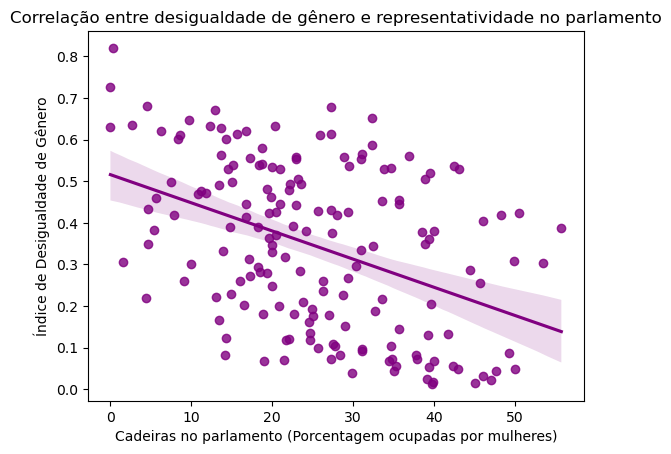

In [ ]:
# Identificando a Correlação entre desigualdade de gênero e representatividade no parlamento
fig, ax = plt.subplots()
sns.regplot(x=df["Seats_parliament"], y=df["GII"], color="purple", ax=ax)

ax.set_title("Correlação entre desigualdade de gênero e representatividade no parlamento")
ax.set_xlabel("Cadeiras no parlamento (Porcentagem ocupadas por mulheres)")
ax.set_ylabel("Índice de Desigualdade de Gênero")

Text(0, 0.5, 'Índice de Desigualdade de Gênero')

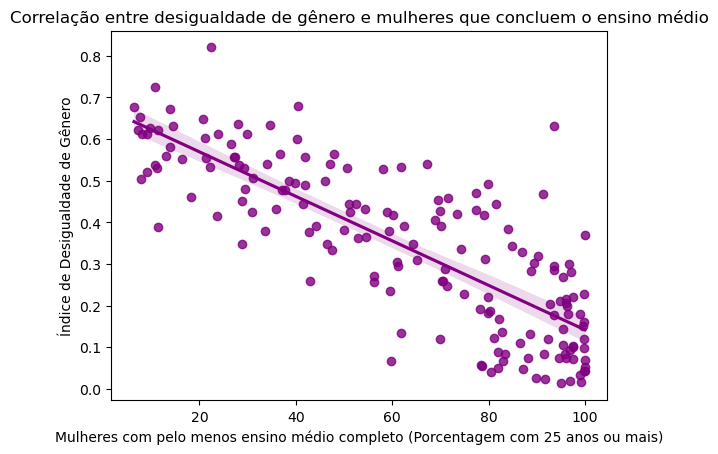

In [ ]:
# Identificando a Correlação entre desigualdade de gênero e mulheres que concluem o ensino médio
fig, ax = plt.subplots()
sns.regplot(x=df["F_secondary_educ"], y=df["GII"], color="purple", ax=ax)

ax.set_title("Correlação entre desigualdade de gênero e mulheres que concluem o ensino médio")
ax.set_xlabel("Mulheres com pelo menos ensino médio completo (Porcentagem com 25 anos ou mais)")
ax.set_ylabel("Índice de Desigualdade de Gênero")

Text(0, 0.5, 'Índice de Desigualdade de Gênero')

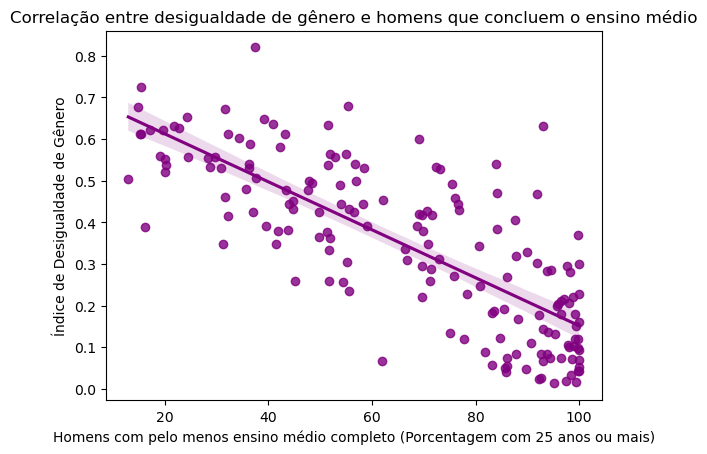

In [ ]:
#Identificando a Correlação entre desigualdade de gênero e homens que concluem o ensino médio
fig, ax = plt.subplots()
sns.regplot(x=df["M_secondary_educ"], y=df["GII"], color="purple", ax=ax)

ax.set_title("Correlação entre desigualdade de gênero e homens que concluem o ensino médio")
ax.set_xlabel("Homens com pelo menos ensino médio completo (Porcentagem com 25 anos ou mais)")
ax.set_ylabel("Índice de Desigualdade de Gênero")

Text(0, 0.5, 'Índice de Desigualdade de Gênero')

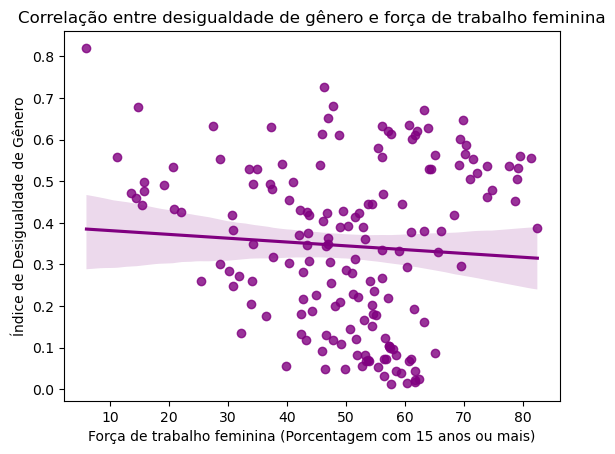

In [ ]:
# Identificando a correlação entre desigualdade de gênero e força de trabalho feminina
fig, ax = plt.subplots()
sns.regplot(x=df["F_Labour_force"], y=df["GII"], color="purple", ax=ax)

ax.set_title("Correlação entre desigualdade de gênero e força de trabalho feminina")
ax.set_xlabel("Força de trabalho feminina (Porcentagem com 15 anos ou mais)")
ax.set_ylabel("Índice de Desigualdade de Gênero")

Text(0, 0.5, 'Índice de Desigualdade de Gênero')

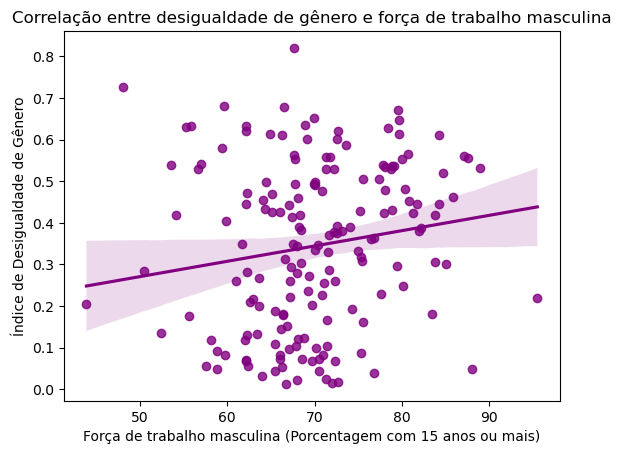

In [ ]:
# Identificando a correlação entre desigualdade de gênero e força de trabalho masculina
fig, ax = plt.subplots()
sns.regplot(x=df["M_Labour_force"], y=df["GII"], color="purple", ax=ax)

ax.set_title("Correlação entre desigualdade de gênero e força de trabalho masculina")
ax.set_xlabel("Força de trabalho masculina (Porcentagem com 15 anos ou mais)")
ax.set_ylabel("Índice de Desigualdade de Gênero")

## Principais observações:

- Os 5 países com menor desigualdade de gênero são: Dinamarca, Noruega, Suíça, Suécia e Holanda
- Observa-se uma maior desigualdade de gênero em países do hemisfério sul, salvo algumas exceções, como Nova Zelândia e Austrália
- Observa-se que quanto maior a desigualdade de gênero em um país, maior é a taxa mortalidade materna, gravidez na adolescência e a força de trabalho masculina e menor é o número de cadeiras ocupadas por mulheres no parlamento, a quantidade de mulheres e homens com pelo menos ensino médio completo e a força de trabalho feminina.